In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import MinMaxScaler
import math as mt

In [23]:
df = pd.read_csv("train.csv")
df

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,...,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,3,2,1,0,0,1,0,Class_7


In [3]:
df[['target']].values

array([['Class_6'],
       ['Class_6'],
       ['Class_2'],
       ...,
       ['Class_8'],
       ['Class_7'],
       ['Class_8']], dtype=object)

In [4]:
Class = [ ord(s[0][-1]) - 48 for s in df[['target']].values ]
df['Class'] = Class
df = df.drop('target', axis = 1)

In [5]:
class_1 = list(df[df['Class']==1][['Class']].index)
class_2 = list(df[df['Class']==2][['Class']].index)
class_3 = list(df[df['Class']==3][['Class']].index)
class_4 = list(df[df['Class']==4][['Class']].index)
class_5 = list(df[df['Class']==5][['Class']].index)
class_6 = list(df[df['Class']==6][['Class']].index)
class_7 = list(df[df['Class']==7][['Class']].index)
class_8 = list(df[df['Class']==8][['Class']].index)
class_9 = list(df[df['Class']==9][['Class']].index)

classes_dict = {1: class_1, 2: class_2, 3: class_3, 4: class_4, 5: class_5, 6: class_6, 7: class_7, 8: class_8, 9: class_9}

In [6]:
target = np.reshape(df[['Class']].values, df.shape[0])
target

array([6, 6, 2, ..., 8, 7, 8], dtype=int64)

In [7]:
[ df[df['Class']==i].shape[0] for i in range(1,10) ]

[9118, 24431, 14798, 4704, 3064, 51811, 14769, 51763, 25542]

In [8]:
#intitializing weights and biases 

np.random.seed(0)
W = np.random.rand(75,9)
bias = np.random.rand(1,9)
bias[0]

array([0.65342116, 0.72634246, 0.536923  , 0.11047711, 0.40503561,
       0.40537358, 0.32104299, 0.02995032, 0.73725424])

In [9]:
#extracting the input and target values from the dataframe

X = df.drop(['id', 'Class'], axis = 1).values
Y = df[['Class']].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X


array([[0.        , 0.        , 0.09375   , ..., 0.03278689, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00769231,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01639344, 0.03921569, 0.        , ..., 0.01639344, 0.        ,
        0.        ],
       [0.        , 0.        , 0.03125   , ..., 0.        , 0.00769231,
        0.        ],
       [0.08196721, 0.07843137, 0.        , ..., 0.03278689, 0.02307692,
        0.01923077]])

In [10]:
def softmax(a):
    #np.seterr(divide = 'ignore', invalid = 'ignore', over = 'ignore')
    b = np.exp(a)
    return b/np.reshape(np.sum(b, axis = 1), (b.shape[0], 1))

In [11]:
def forward_prop(X, W, bias):
    return softmax(np.dot(X,W) + bias)

In [12]:
def loss(y_pred, Y):
    log_loss = 0
    for i in range(0,y_pred.shape[0]):
        if y_pred[i][Y[i]-1] == 0:
            print("WHAAAATTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT!!!!!!!!!!!!!!!")
        log_loss += -np.log(y_pred[i][Y[i]-1])
    
    log_loss = log_loss/y_pred.shape[0]
    return log_loss

In [13]:
def back_prop(X, y_pred, target):
    dw = np.zeros((75,9))
    db = np.zeros((1,9))
    
    n = X.shape[0]
        

    for i in range(0,X.shape[0]):
        for j in range(0,75):
            dw[j][target[i]-1] += X[i][j] * (y_pred[i][target[i]-1] - 1)
            
        db[0][target[i]-1] += (y_pred[i][target[i]-1] - 1)
    
    dw /= n
    db /= n
    
    grad = {'dw': dw, 'db': db}
    
    return grad

In [33]:
cc = 10000
pred = forward_prop(X, W, bias)
while True and np.array([cc]) >= 1.9374:
    cc = 1.9373
    print("yes")

yes


In [15]:
yes = np.ones((1,9))

mat = np.ones((5,4))

np.exp(mat)/np.reshape(np.sum(np.exp(mat), axis = 1), (5,1))

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [36]:
def train(X, target, W, bias, lr = 0.01, iterations = 10000, m = 1000):
    losses = []
    epoch = 1
    y_pred = np.zeros(())
    check  = np.zeros((75,9))
    
    while epoch <= iterations:
        y_pred = forward_prop(X, W, bias)
        
        cost = loss(y_pred, Y)
        
        #if epoch%100 == 0:
         #   print(cost)
        
        if epoch%100 == 0:
            print(cost[0])
            
        
        losses.append(cost[0])
        #print(cost)
        
        if cost[0]<=1.9399:
            break
        
        idx = np.random.choice(X.shape[0], m, replace = False)
        
        grad = back_prop(X[idx, :], y_pred[idx, :], target[idx])
        W = W - lr * grad['dw']
        bias = bias - lr * grad['db']
        
        epoch += 1
        
    #plt.plot(list(np.arange(iterations)), losses)
    #plt.show()
    
    return W, bias, losses

In [37]:
W, bias, losses = train(X, target, W, bias)

2.2739337619711586
2.2088373069331118
2.1517704167572007
2.1020409261413073
2.059486383543965
2.024134203964667
1.995262564566314
1.972865662577815
1.9563687983085847
1.9453946583919088


In [38]:
y_pred = forward_prop(X, W, bias)
cost = loss(y_pred, Y)
print(cost)

[1.93988187]


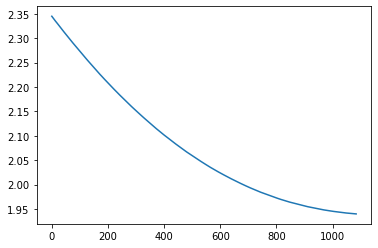

In [40]:
plt.plot(list(np.arange(len(losses))), losses)
plt.show()

In [ ]:
'''    
    for j in range(0,9):
        for i in range(0,75):
            for ind in classes_dict[j+1]:
                dw[i][j] += X[ind][i] * (y_pred[ind][j] - 1)
            
            dw[i][j] /= n
        
        for ind in classes_dict[j+1]:
            db[0][j] += (y_pred[ind][j] - 1)
        
        db[0][j] /= n
'''

In [166]:
yes = np.ones((5,4))
yes[0][0] = 0
no = np.reshape(np.sum(yes, axis = 1), (5,1))
yes/no

array([[0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      ]])

In [41]:
test_df = pd.read_csv("test.csv")
test_df

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,299995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,299996,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,299997,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
99998,299998,0,0,0,0,2,2,0,0,1,...,1,0,0,0,0,1,0,1,0,0


In [49]:
indices = list(test_df[["id"]].values.reshape(test_df.shape[0]))
indices

[200000,
 200001,
 200002,
 200003,
 200004,
 200005,
 200006,
 200007,
 200008,
 200009,
 200010,
 200011,
 200012,
 200013,
 200014,
 200015,
 200016,
 200017,
 200018,
 200019,
 200020,
 200021,
 200022,
 200023,
 200024,
 200025,
 200026,
 200027,
 200028,
 200029,
 200030,
 200031,
 200032,
 200033,
 200034,
 200035,
 200036,
 200037,
 200038,
 200039,
 200040,
 200041,
 200042,
 200043,
 200044,
 200045,
 200046,
 200047,
 200048,
 200049,
 200050,
 200051,
 200052,
 200053,
 200054,
 200055,
 200056,
 200057,
 200058,
 200059,
 200060,
 200061,
 200062,
 200063,
 200064,
 200065,
 200066,
 200067,
 200068,
 200069,
 200070,
 200071,
 200072,
 200073,
 200074,
 200075,
 200076,
 200077,
 200078,
 200079,
 200080,
 200081,
 200082,
 200083,
 200084,
 200085,
 200086,
 200087,
 200088,
 200089,
 200090,
 200091,
 200092,
 200093,
 200094,
 200095,
 200096,
 200097,
 200098,
 200099,
 200100,
 200101,
 200102,
 200103,
 200104,
 200105,
 200106,
 200107,
 200108,
 200109,
 200110,
 

In [43]:
test_X = test_df.drop(["id"], axis = 1).values

scaler = MinMaxScaler()
test_X = scaler.fit_transform(test_X)
test_X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01639344, 0.03921569, 0.        , ..., 0.04918033, 0.        ,
        0.        ],
       [0.        , 0.01960784, 0.109375  , ..., 0.03278689, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.03846154],
       [0.        , 0.        , 0.        , ..., 0.01639344, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [44]:
test_pred_Y = forward_prop(test_X, W, bias)
test_pred_Y

array([[0.05696977, 0.12199304, 0.0693906 , ..., 0.05529041, 0.23005254,
        0.12715228],
       [0.05519249, 0.13829284, 0.06029038, ..., 0.05420472, 0.20983286,
        0.13491417],
       [0.06006704, 0.13476482, 0.0754013 , ..., 0.05128249, 0.21017377,
        0.13137955],
       ...,
       [0.05774096, 0.12105523, 0.06872006, ..., 0.05434501, 0.22723974,
        0.13042307],
       [0.04863333, 0.15803126, 0.06291218, ..., 0.05574346, 0.19204219,
        0.13972055],
       [0.04826584, 0.11729308, 0.0727722 , ..., 0.04755262, 0.2091114 ,
        0.14154754]])

In [45]:
np.sum(test_pred_Y, axis = 1)

array([1., 1., 1., ..., 1., 1., 1.])

In [50]:
result = pd.DataFrame(test_pred_Y, columns = ["Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9"])
result.insert(0, "id", indices)
result

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.056970,0.121993,0.069391,0.027532,0.032938,0.278682,0.055290,0.230053,0.127152
1,200001,0.055192,0.138293,0.060290,0.026443,0.031362,0.289468,0.054205,0.209833,0.134914
2,200002,0.060067,0.134765,0.075401,0.023703,0.031199,0.282028,0.051282,0.210174,0.131380
3,200003,0.050111,0.145492,0.073112,0.028676,0.027166,0.270369,0.060966,0.178784,0.165324
4,200004,0.061941,0.135752,0.074142,0.030978,0.021543,0.282386,0.058543,0.207325,0.127390
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.056260,0.123471,0.066676,0.028099,0.033718,0.279443,0.055227,0.226988,0.130118
99996,299996,0.055815,0.122407,0.064271,0.025294,0.034602,0.298601,0.057026,0.217932,0.124053
99997,299997,0.057741,0.121055,0.068720,0.027346,0.032679,0.280451,0.054345,0.227240,0.130423
99998,299998,0.048633,0.158031,0.062912,0.022645,0.030796,0.289476,0.055743,0.192042,0.139721


In [51]:
sdf = pd.read_csv("sample_submission.csv")
sdf

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
1,200001,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
2,200002,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
3,200003,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
4,200004,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99996,299996,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99997,299997,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111
99998,299998,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111,0.1111


In [54]:
result.to_csv("submission.csv", index = False)